# Python Project - Polynomial Regression

 Are we getting taller?  There is no noticeable height change in humans from when record keeping started to the early 1800's but since that time the average height has been increasing. Today, on average, we are taller than our predecessors but these gains vary considerably from country to country.   Researchers found that today Dutch men have the highest average heights at 182.5 centimeters (about 6 feet) and Latvian women at 170 cm (about 5 feet 6.5 inches) with Dutch women in second place. A century ago the  United States ranked third in adult male height but it currently ranks 37th so the gain here is not as large as in other countries.

In this project we use linear and quadratic regression to model the growth in the average height of men in the United States and the Netherlands from 1925-1995.  

The data for this lab was taken from the website ourworldindata.org which got the data from NCD RisC (a network of health scientists around the world).  

The data is contained in the file human_heights.txt which consists of 5 columns of  numerical data in the following order:  year, Dutch men average height, Dutch women average height, US men average height, US women average height.   The heights are given in centimeters.

In [2]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#exact values for later comparison and reference 
dutch_man_1925 = 174.83; us_man_1925 = 174.53
dutch_man_1955 = 180.23; us_man_1955 = 177.22
dutch_man_1995 = 182.54; us_man_1995 = 177.16

dutch_woman_1925 = 162.2; us_woman_1925 = 160.97
dutch_woman_1955 = 167.11; us_woman_1955 = 163.54
dutch_woman_1995 = 168.73; us_woman_1995 = 163.56

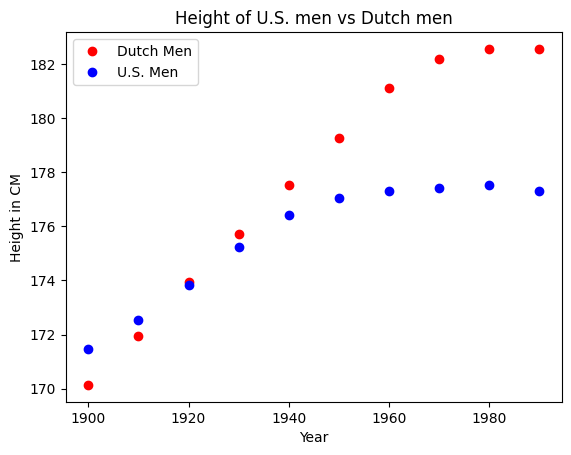

In [4]:
# Read in the data
years = np.loadtxt('human_heights.txt', skiprows=2, usecols=0)
dutch_men = np.loadtxt('human_heights.txt', skiprows=2, usecols=1)
us_men = np.loadtxt('human_heights.txt', skiprows=2, usecols=3)
#plot
plt.plot(years,dutch_men,'ro',label='Dutch Men')
plt.plot(years,us_men,'bo',label='U.S. Men')
plt.xlabel("Year")
plt.ylabel("Height in CM")
plt.title("Height of U.S. men vs Dutch men")
plt.legend()
plt.show()

Regression Line equation for Dutch Men: y = 0.15x + -111.14
Regression Line equation for U.S. Men: y = 0.07x + 43.43


<function matplotlib.pyplot.show(close=None, block=None)>

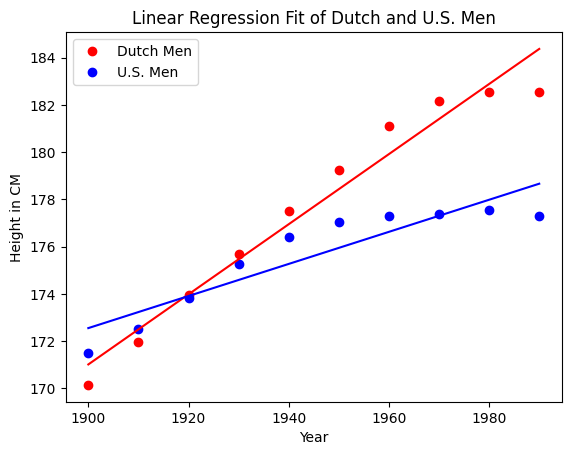

In [5]:
# Linear regression fit for both Dutch and U.S. Men 
dutch_coeff = np.polyfit(years,dutch_men,1)
print('Regression Line equation for Dutch Men: y = {:.2f}x + {:.2f}'.format(dutch_coeff[0], dutch_coeff[1]))
f = np.poly1d(dutch_coeff)
years_min = np.min(years)
years_max = np.max(years)
xx= np.linspace(years_min,years_max , 2)
yy= f(xx)

us_coeff = np.polyfit(years,us_men,1)
f2= np.poly1d(us_coeff)
yyy=f2(xx)
print('Regression Line equation for U.S. Men: y = {:.2f}x + {:.2f}'.format(us_coeff[0], us_coeff[1]))
#plot
plt.plot(years, dutch_men, "ro", label = "Dutch Men")
plt.plot(years,us_men,'bo',label='U.S. Men')
plt.plot(xx,yy, "r")
plt.plot(xx,yyy, "b")
plt.xlabel('Year')
plt.ylabel('Height in CM')
plt.legend()
plt.title('Linear Regression Fit of Dutch and U.S. Men')
plt.show

In [6]:
# Determine the variance and standard deviation of the linear regression model
def calculate_variance  ( x, y,coeff):
# Input: the x and y arrays for the data points, coefficients of line found using LR      
# Output: variance   
    n=len(x)
    degree = len(coeff) -1
    var = 0.0
    for i in range(0,n) :
        if (degree == 1 ) :
            y_line =  coeff[0] * x[i] + coeff[1] # calculate value of y on line for given x[i]
        else :
            y_line =  coeff[0] * x[i]*x[i] + coeff[1] *x[i] + coeff[2]
        y_data  = y[i]  # y height of data point at x[i]
        distance = y_data-y_line
        var = var + distance * distance
    var =  ( var )/ float(n) 
    return (var)

us_var = calculate_variance(years, us_men,us_coeff)
dutch_var = calculate_variance(years, dutch_men,dutch_coeff)
print(' The variance of the linear fit to the Dutch Mens data is',round(dutch_var,2))
print(' The standard deviaiton of the linear fit to Dutch Mens data is',round(np.sqrt(dutch_var),2))
print("")
print(' The variance of the linear fit to the U.S. Mens data is',round(us_var,2))
print(' The standard deviaiton of the linear fit to U.S. Mens data is',round(np.sqrt(us_var),2))
 

 The variance of the linear fit to the Dutch Mens data is 0.76
 The standard deviaiton of the linear fit to Dutch Mens data is 0.87

 The variance of the linear fit to the U.S. Mens data is 0.71
 The standard deviaiton of the linear fit to U.S. Mens data is 0.84


The quadratic equation of the parabola for Dutch Men: y = -0.00x^2 + 4.35x + -4194.19
The quadratic equation of the parabola for U.S. Men: y = -0.00x^2 + 4.47x + -4240.20


<function matplotlib.pyplot.show(close=None, block=None)>

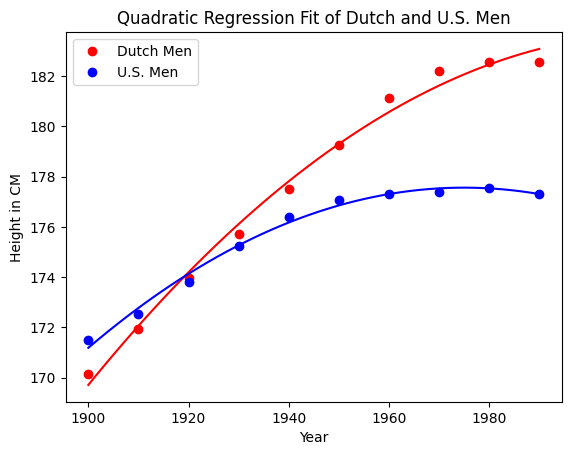

In [8]:
# Quadratic regression fit equations for Dutch and U.S. Men
quad_dutch_coeff = np.polyfit(years,dutch_men,2)
print('The quadratic equation of the parabola for Dutch Men: y = {:.2f}x^2 + {:.2f}x + {:.2f}'.format(quad_dutch_coeff[0], quad_dutch_coeff[1],quad_dutch_coeff[2]))
f3= np.poly1d(quad_dutch_coeff)
years_min = np.min(years)
years_max = np.max(years)
xx= np.linspace(years_min,years_max)
yy= f3(xx)

quad_us_coeff = np.polyfit(years,us_men,2)
f4= np.poly1d(quad_us_coeff)
yyy=f4(xx)
print('The quadratic equation of the parabola for U.S. Men: y = {:.2f}x^2 + {:.2f}x + {:.2f}'.format(quad_us_coeff[0], quad_us_coeff[1],quad_us_coeff[2]))
#plot
plt.plot(years, dutch_men, "ro", label = "Dutch Men")
plt.plot(years,us_men,'bo',label='U.S. Men')
plt.plot(xx,yy, "r")
plt.plot(xx,yyy, "b")
plt.xlabel('Year')
plt.ylabel('Height in CM')
plt.legend()
plt.title('Quadratic Regression Fit of Dutch and U.S. Men')
plt.show

In [9]:
# Calculate variance for the quadratic fits
def calculate_variance  ( x, y,coeff):
# Input: the x and y arrays for the data points, coefficients of line found using LR      
# Output: variance   
    n=len(x)
    degree = len(coeff) -1
    var = 0.0
    for i in range(0,n) :
        if (degree == 1 ) :
            y_line =  coeff[0] * x[i] + coeff[1] # calculate value of y on line for given x[i]
        else :
            y_line =  coeff[0] * x[i]*x[i] + coeff[1] *x[i] + coeff[2]
        y_data  = y[i]  # y height of data point at x[i]
        distance = y_data-y_line
        var = var + distance * distance
    var =  ( var )/ float(n) 
    return (var)

quad_us_var = calculate_variance(years, us_men,quad_us_coeff)
quad_dutch_var = calculate_variance(years, dutch_men,quad_dutch_coeff)
print(' The variance of the quadratic fit to the Dutch Mens data is',round(quad_dutch_var,2))
print(' The standard deviaiton of the quadratic fit to Dutch Mens data is',round(np.sqrt(quad_dutch_var),2))
print("")
print(' The variance of the quadratic fit to the U.S. Mens data is',round(quad_us_var,2))
print(' The standard deviaiton of the quadratic fit to U.S. Mens data is',round(np.sqrt(quad_us_var),2))

 The variance of the quadratic fit to the Dutch Mens data is 0.14
 The standard deviaiton of the quadratic fit to Dutch Mens data is 0.38

 The variance of the quadratic fit to the U.S. Mens data is 0.04
 The standard deviaiton of the quadratic fit to U.S. Mens data is 0.19


#### Conclusion
 

I predict the average heights using the quadratic best fit parabola because it has a much lower variance and thus is more accuracte.
 
 

In [11]:
# Using the quad best fit to predict average heights in 1955 and 1995 for both Dutch and U.S.
# compute percent error;
print(f"The quadratic best fit parabola predicts a Dutch man in 1955 having the height of {round(f3(1955))}cm")
print(f"with a percent error of: {round(abs(((dutch_man_1995 - f3(1955))/f3(1955)))*100)}%")
print("")
print(f"The quadratic best fit parabola predicts a U.S. man in 1955 having the height of {round(f4(1955))}cm")
print(f"with a percent error of: {round(abs(((us_man_1995 - f4(1955))/f4(1955)))*100)}%") 
 

The quadratic best fit parabola predicts a Dutch man in 1955 having the height of 180cm
with a percent error of: 1%

The quadratic best fit parabola predicts a U.S. man in 1955 having the height of 177cm
with a percent error of: 0%


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a92f6c76-7563-4c17-8912-8cdcf66085a0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>